# Análisis Bases de datos B2C

In [1]:
import sys
!pip install pandas
import pandas as pd
import numpy as np
import nltk


import re
import nltk
from joblib import dump, load
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=200
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Asegúrate de importar StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score




import scipy.stats as stats
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold

# Metricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# q-q plots
import scipy.stats as stats


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\volpi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Carga de datos 

In [2]:
pd1 = pd.read_csv('base_1_transaccional.txt', sep = '\t')
pd2 = pd.read_csv('base_2_cotizaciones.txt', sep = '\t')

df_trans_B2C = pd1.copy()
df_cot_B2C = pd2.copy()

Se cargan los datos y se generan copias para no modificar los datos originales

A continuación se realizaron los respectivos análisis y entendimiento de datos de ambas base B2C, por separado

# Transaccional B2C

## 1. Entendimiento y Perfilamiento de datos

In [3]:
df_trans_B2C.shape

(2099836, 18)

In [4]:
df_trans_B2C.sample(10)

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
14922,1971-04-25,3452,3045,41,GUATICA,RISARALDA,asesor_100,punto_venta_9,cluster_tienda_3,categoria_macro_1,categoria_1,subcategoria_15,producto_1518,No encontrado,2.00,2.24,4.48,0.383616
325608,1972-08-04,144387,93919,30,APIA,RISARALDA,asesor_56,punto_venta_1,cluster_tienda_1,categoria_macro_2,categoria_5,subcategoria_5,producto_39,GRIS,3.78,2.37,8.95,0.566784
730014,1973-01-07,326717,193774,56,CURITI,SANTANDER,asesor_69,punto_venta_12,cluster_tienda_1,categoria_macro_2,categoria_3,subcategoria_22,producto_49,GRIS,250.00,0.08,19.80,1.876608
1279208,1972-03-09,570838,35483,46,GUATICA,RISARALDA,asesor_118,punto_venta_28,cluster_tienda_2,categoria_macro_2,categoria_7,subcategoria_5,producto_129,BLANCO,3.20,3.05,9.76,0.867456
212647,1971-08-14,94506,56806,53,GUASCA,CUNDINAMARCA,asesor_354,punto_venta_25,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_9,producto_19,GRIS,50.00,0.11,5.45,0.566784
1853861,1972-10-25,771276,359650,40,EL TARRA,NORTE SANTANDER,asesor_489,punto_venta_63,cluster_tienda_5,categoria_macro_4,categoria_11,subcategoria_41,producto_238,No encontrado,1.00,4.04,4.04,0.542592
144543,1972-04-07,64154,42560,60,CURITI,SANTANDER,asesor_71,punto_venta_20,cluster_tienda_3,categoria_macro_4,categoria_12,subcategoria_14,producto_3114,No encontrado,1.00,33.13,33.13,2.944512
296815,1972-08-15,131819,87111,31,CURITI,SANTANDER,asesor_363,punto_venta_20,cluster_tienda_3,categoria_macro_2,categoria_3,subcategoria_9,producto_67,GRIS,225.00,0.29,65.40,8.380800
875901,1972-02-07,392446,85507,30,PASTO,NARIÑO,asesor_209,punto_venta_26,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_3,producto_156,No encontrado,2.00,0.65,1.30,0.134784
488449,1972-12-05,217390,136454,24,CURITI,SANTANDER,asesor_292,punto_venta_12,cluster_tienda_1,categoria_macro_2,categoria_5,subcategoria_5,producto_3097,BLANCO,7.76,2.49,19.35,1.503360


In [5]:
df_trans_B2C.head()

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
0,1971-04-30,2,2,52,EL CARMEN DE CHUCURI,SANTANDER,asesor_2,punto_venta_2,cluster_tienda_2,categoria_macro_1,categoria_2,subcategoria_2,producto_2,GRIS,1.00,32.88,32.88,2.920320
1,1971-04-30,3,3,31,VILLANUEVA,LA GUAJIRA,asesor_3,punto_venta_2,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_3,producto_3,BEIGE,2.00,0.56,1.13,0.117504
2,1971-04-30,4,4,43,VILLANUEVA,LA GUAJIRA,asesor_4,punto_venta_2,cluster_tienda_2,categoria_macro_3,categoria_4,subcategoria_4,producto_4,No encontrado,1.00,8.38,8.38,1.251072
3,1971-04-30,5,5,31,VILLANUEVA,LA GUAJIRA,asesor_5,punto_venta_3,cluster_tienda_3,categoria_macro_2,categoria_5,subcategoria_5,producto_5,BLANCO,21.14,2.27,47.99,3.729024
4,1971-04-30,6,6,49,ARROYOHONDO,BOLÍVAR,asesor_6,punto_venta_4,cluster_tienda_2,categoria_macro_4,categoria_6,subcategoria_6,producto_6,No encontrado,1.00,9.96,9.96,1.223424


In [6]:
df_trans_B2C.describe()

,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2.099836e+06,2.099836e+06,2.099836e+06,2.099836e+06,2.099305e+06,2.099836e+06,2.099836e+06
mean,4.670092e+05,1.653520e+05,4.187073e+01,3.805441e+01,9.244210e+00,3.999169e+01,3.945120e+00
std,2.705491e+05,1.214593e+05,9.563071e+00,7.464008e+02,2.953051e+01,1.650740e+02,2.192130e+01
min,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.418746e+04
25%,2.317010e+05,5.829400e+04,3.200000e+01,1.000000e+00,6.500000e-01,4.690000e+00,4.734720e-01
50%,4.668240e+05,1.379730e+05,4.300000e+01,3.020000e+00,2.990000e+00,1.332000e+01,1.410048e+00
75%,7.026782e+05,2.617442e+05,4.900000e+01,1.296000e+01,6.270000e+00,3.713000e+01,3.725568e+00
max,9.339360e+05,4.192260e+05,6.700000e+01,4.896890e+05,1.204348e+04,5.687609e+04,4.162227e+03


In [7]:
df_trans_B2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099836 entries, 0 to 2099835
Data columns (total 18 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   fecha                                  object 
 1   pedido                                 int64  
 2   id                                     int64  
 3   edad                                   int64  
 4   municipio                              object 
 5   zona                                   object 
 6   asesor                                 object 
 7   punto de venta                         object 
 8   cluster                                object 
 9   categoria_macro                        object 
 10  categoria                              object 
 11  subcategoria                           object 
 12  producto                               object 
 13  color                                  object 
 14  cantidad                               float64
 15

In [8]:
# Para categorizar las variables en su tipo de dato
categorical_cols = df_trans_B2C.select_dtypes(include=["object"]).columns
numeric_cols = df_trans_B2C.select_dtypes(include=["number"]).columns
datetime_cols = df_trans_B2C.select_dtypes(include=["datetime"]).columns

# Imprimir las variables categóricas
print("Variables categóricas:")
print(", ".join(categorical_cols))

# Imprimir las variables numéricas
print("\nVariables numéricas:")
print(", ".join(numeric_cols))

# Imprimir las variables de fecha
print("\nVariables de fecha:")
print(", ".join(datetime_cols))

Variables categóricas:
fecha, municipio, zona, asesor, punto de venta, cluster, categoria_macro, categoria, subcategoria, producto, color

Variables numéricas:
pedido, id, edad, cantidad, precio, valor, alineación con portafolio estratégico

Variables de fecha:



Se observa que la columna de fecha no corresponde a un tipo fecha sino que es asignada como variable categórica

### 1.1 Atributos Numéricos

In [9]:
var_num = ['pedido', 'id', 'edad', 'cantidad', 'precio', 'valor', 'alineación con portafolio estratégico']

In [10]:
df_trans_B2C[var_num].describe()

,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2.099836e+06,2.099836e+06,2.099836e+06,2.099836e+06,2.099305e+06,2.099836e+06,2.099836e+06
mean,4.670092e+05,1.653520e+05,4.187073e+01,3.805441e+01,9.244210e+00,3.999169e+01,3.945120e+00
std,2.705491e+05,1.214593e+05,9.563071e+00,7.464008e+02,2.953051e+01,1.650740e+02,2.192130e+01
min,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.418746e+04
25%,2.317010e+05,5.829400e+04,3.200000e+01,1.000000e+00,6.500000e-01,4.690000e+00,4.734720e-01
50%,4.668240e+05,1.379730e+05,4.300000e+01,3.020000e+00,2.990000e+00,1.332000e+01,1.410048e+00
75%,7.026782e+05,2.617442e+05,4.900000e+01,1.296000e+01,6.270000e+00,3.713000e+01,3.725568e+00
max,9.339360e+05,4.192260e+05,6.700000e+01,4.896890e+05,1.204348e+04,5.687609e+04,4.162227e+03


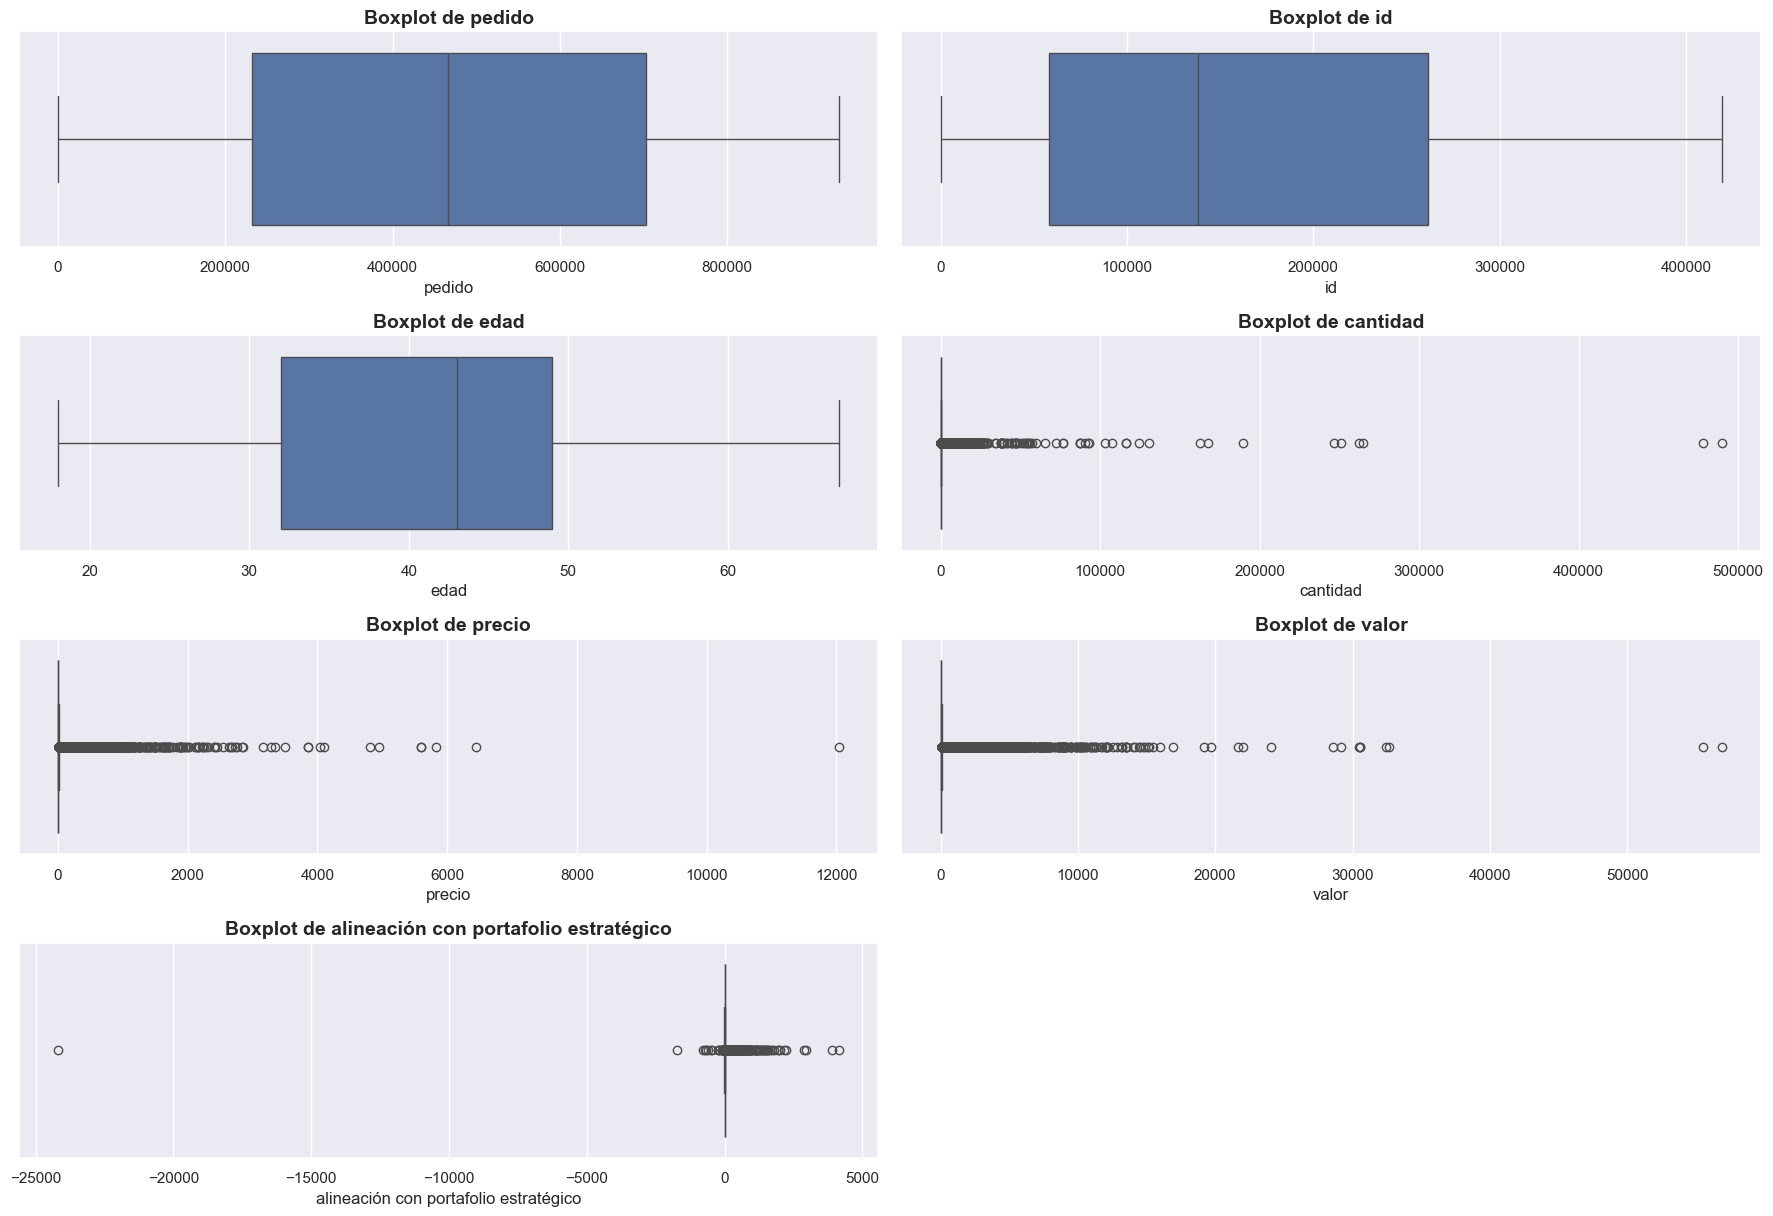

In [11]:
#Diagrama de Cajas y Bigotes por cada variable numerica
plt.figure(figsize=(18, 24))
for i, col in enumerate(var_num, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(x=df_trans_B2C[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Análisis de distribución de variables numércas significativas

<Axes: xlabel='edad', ylabel='Count'>

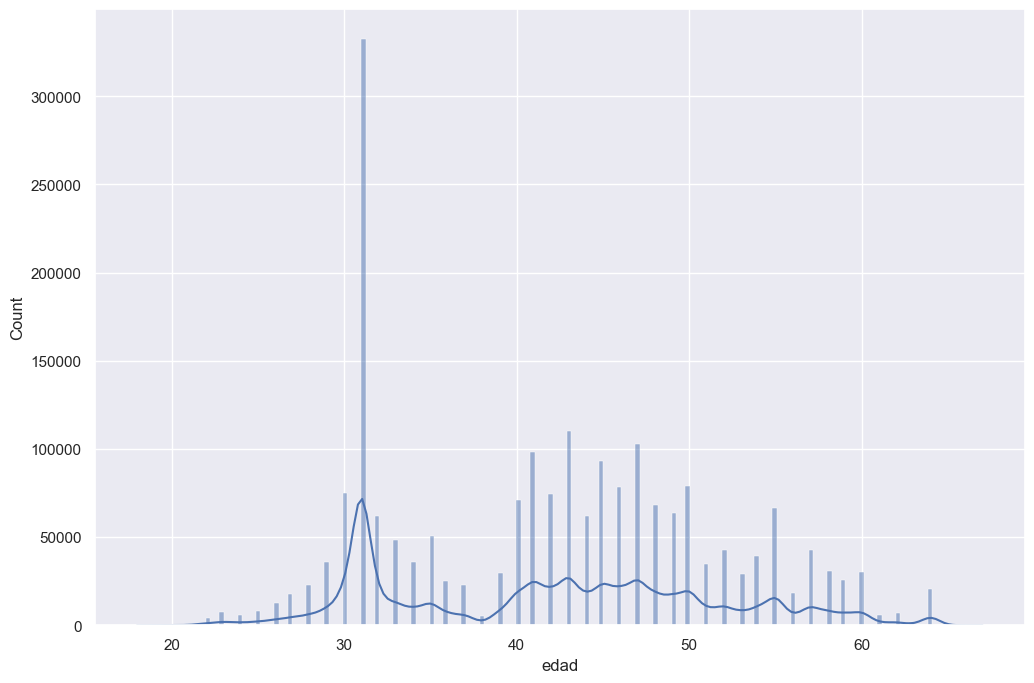

In [13]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="edad", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="precio", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="valor", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="alineación con el portafolio estratégico", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="cantidad", kde=True)

<Axes: >

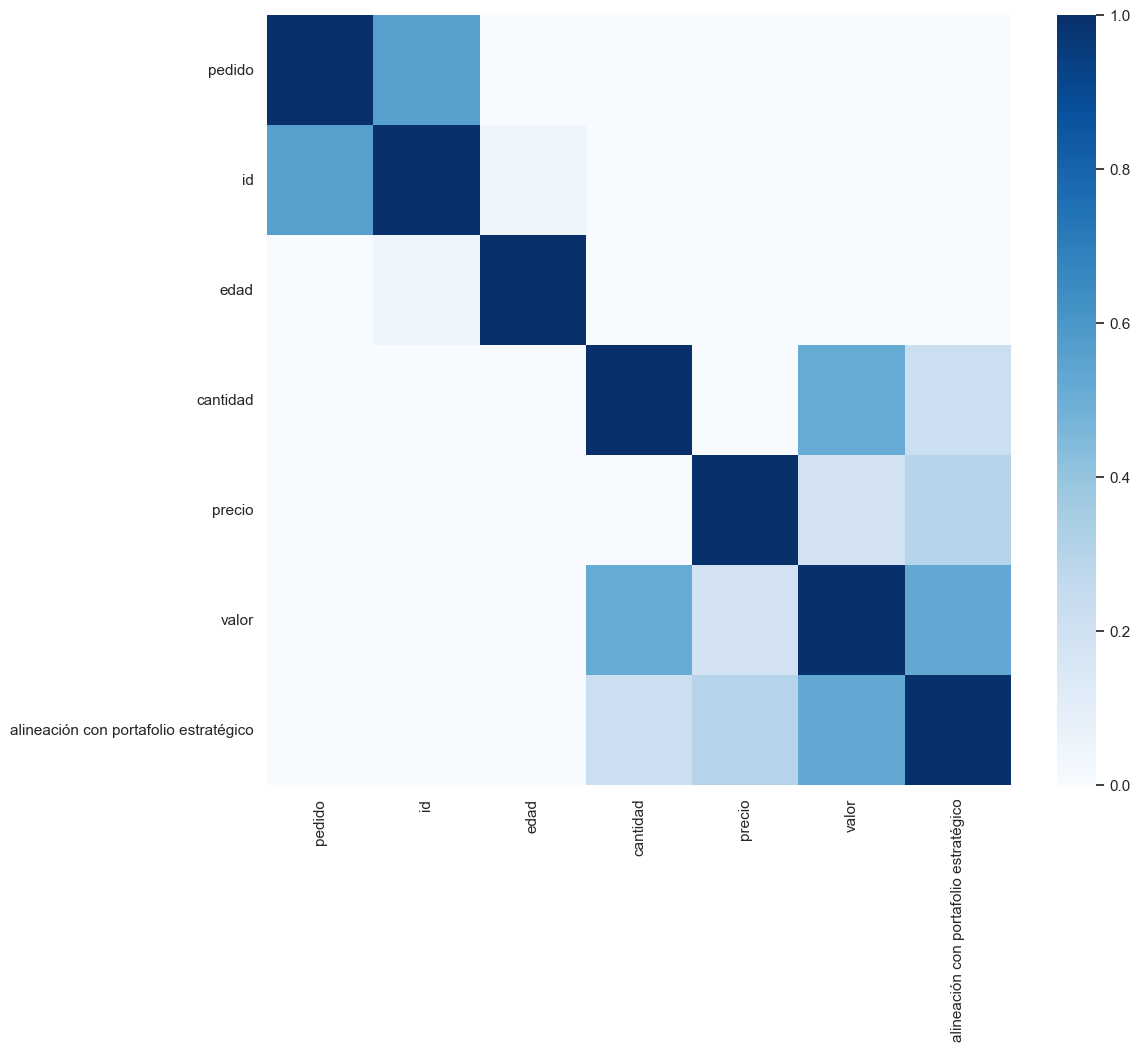

In [ ]:
#Análisis de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_trans_B2C[var_num].corr(), cmap="Blues", vmin=0, vmax=1, annot=True)
plt.title("Correlación entre variables numéricas", fontsize=16, fontweight='bold')


### 1.2 Atributos Categóricos

### 1.3 Análisis Calidad de Datos

## 2. Prepración de datos

# Cotizaciones B2C